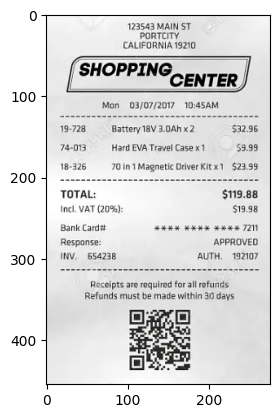

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image
import os

root_dir = os.getcwd()
img_path = root_dir+"/test_imgs/shop_invoice.png"
input_img = cv2.imread(img_path)
plt.imshow(input_img)


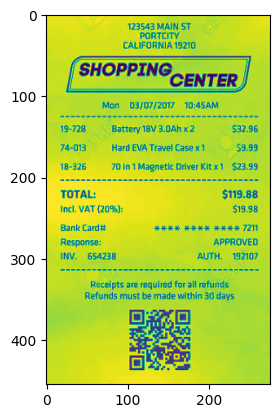

In [2]:
gray_image = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

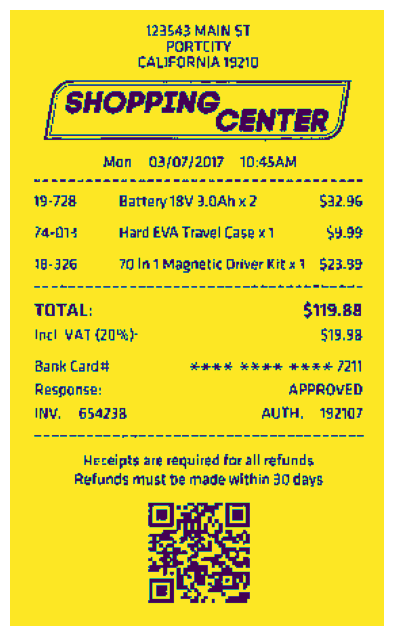

In [3]:
# thresholding
threshold_img = cv2.threshold(gray_image,50,100,8)[1]
fig,ax = plt.subplots(figsize = (15,8))
ax.imshow(threshold_img)
ax.axis('off')
plt.show()
# figure(figsize=(12,8),dpi=80)
# plt.imshow(threshold_img)


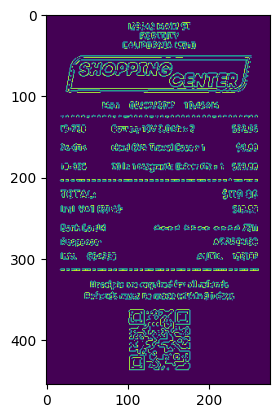

In [6]:
canny_edges = cv2.Canny(threshold_img,50,200,None,3)
plt.imshow(canny_edges)

In [7]:
import math


#lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 230  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
# line_image = np.copy(cv_img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(canny_edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print("No of lines : ",len(lines))
print(lines)

No of lines :  7
[[[ 18 313 260 313]]

 [[ 18 315 260 315]]

 [[ 18 125 259 125]]

 [[ 18 205 259 205]]

 [[ 18 203 259 203]]

 [[ 24 126 259 126]]

 [[ 17 204 259 204]]]


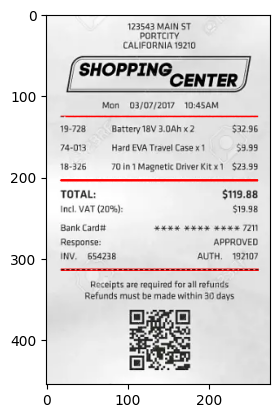

In [11]:
copy_img = input_img.copy()
count = 0
actual_lines = {}
for cur_line in lines:
    start_point = (cur_line[0][0],cur_line[0][1])
    end_point = (cur_line[0][2],cur_line[0][3])
    copy_img = cv2.line(copy_img,start_point,end_point,(255,0,0),1)
    actual_lines[count] = cur_line[0]
    count = count +1
plt.imshow(copy_img)   


In [12]:
actual_lines

{0: array([ 18, 313, 260, 313], dtype=int32),
 1: array([ 18, 315, 260, 315], dtype=int32),
 2: array([ 18, 125, 259, 125], dtype=int32),
 3: array([ 18, 205, 259, 205], dtype=int32),
 4: array([ 18, 203, 259, 203], dtype=int32),
 5: array([ 24, 126, 259, 126], dtype=int32),
 6: array([ 17, 204, 259, 204], dtype=int32)}

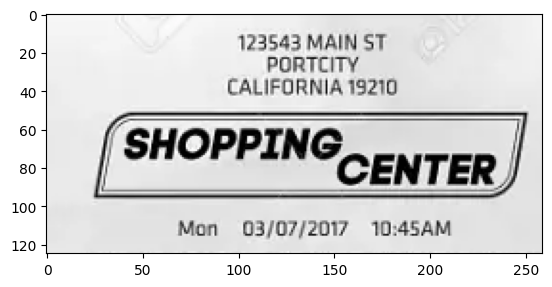

In [14]:
first_line = actual_lines[2]
first_img = input_img[:first_line[1],:first_line[2],:]
plt.imshow(first_img)

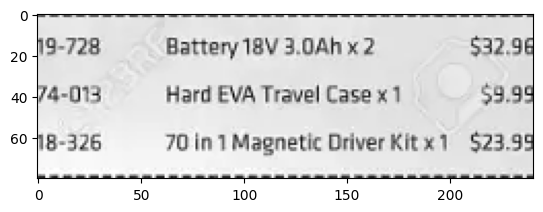

In [16]:
second_line = actual_lines[3]
second_img = input_img[first_line[1]:second_line[1],second_line[0]:second_line[2],:]
plt.imshow(second_img)

In [17]:
cv2.imwrite("first_part.png",second_img)

True